# Clustering

### Kümeleme : datayı benzerliklerine göre gruplara ayırma . Bu bir denetimsiz öğrenim

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('cars.xls')

In [3]:
# Regression R^2 RMSE
# Classification Accuracy , F1Score Confusion Matrix ...
# Clustering silhuette score en optimum grup sayisi

In [4]:
x = df[['Price', 'Mileage', 'Cylinder']]

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
model = KMeans(4)

In [7]:
model = model.fit(x)

In [8]:
tahmin = model.predict(x)

In [9]:
tahmin

array([1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1,
       1, 3, 3, 3, 3, 3, 0, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 3, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1,
       1, 3, 3, 3, 3, 3, 0, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 1, 3, 3, 3, 3,
       3, 3, 0, 0, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1,

In [10]:
x['cluster'] = tahmin

In [11]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,1
1,17542.036083,9135,6,1
2,16218.847862,13196,6,1
3,16336.913140,16342,6,3
4,16339.170324,19832,6,3


In [12]:
silhouette_score(x , tahmin)

np.float64(0.33641477017123617)

Text(0, 0.5, 'Fiyat')

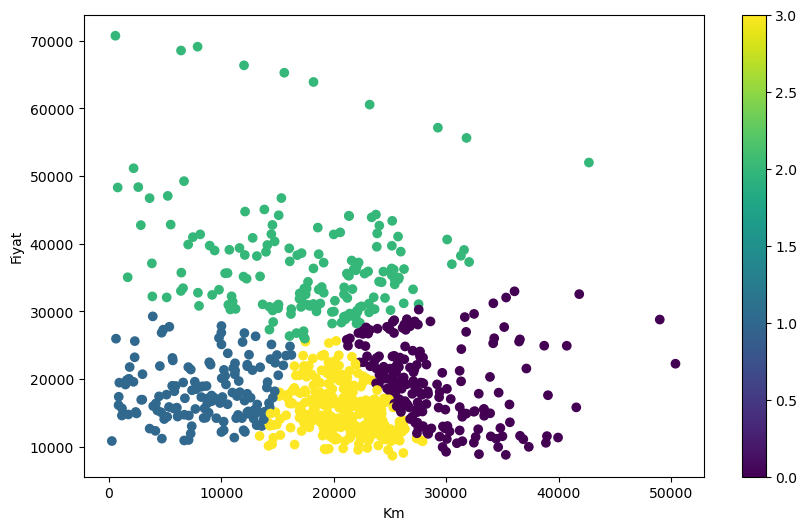

In [13]:
plt.figure(figsize= (10,6))
plt.scatter(x.Mileage, x.Price, c=tahmin)
plt.colorbar();
plt.xlabel("Km")
plt.ylabel("Fiyat")

In [14]:
# Elbow Method

In [15]:
# wcss = within cluster sum of squares

wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)


0.4510408870102853
0.40339246923761984
0.4142768301953111
0.3547176630607021
0.3587708049264679
0.3255385413608836
0.3353615335116293
0.33644113565712197


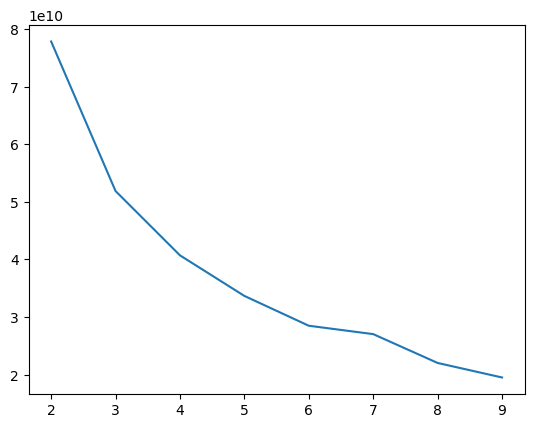

In [16]:
plt.plot(range(2,10),wcss)

In [17]:
from yellowbrick.cluster import KElbowVisualizer

In [18]:
km=KMeans()

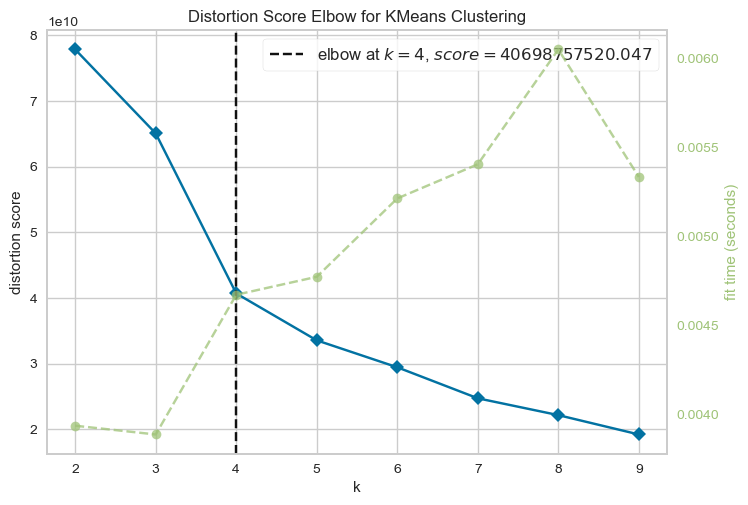

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [26]:
# Hierarchical Clustering

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
data  = linkage(x , method = 'ward' , metric = 'euclidean')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [25.0, 25.0, 56.25, 56.25],
  [10.0, 10.0, 40.625, 40.625],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [106.25, 106.25, 142.5, 142.5],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [172.5, 172.5, 217.5, 217.5],
  [124.375, 124.375, 195.0, 195.0],
  [25.3125, 25.3125, 159.6875, 159.6875],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [300.0, 300.0, 322.5, 322.5],
  [345.0, 34

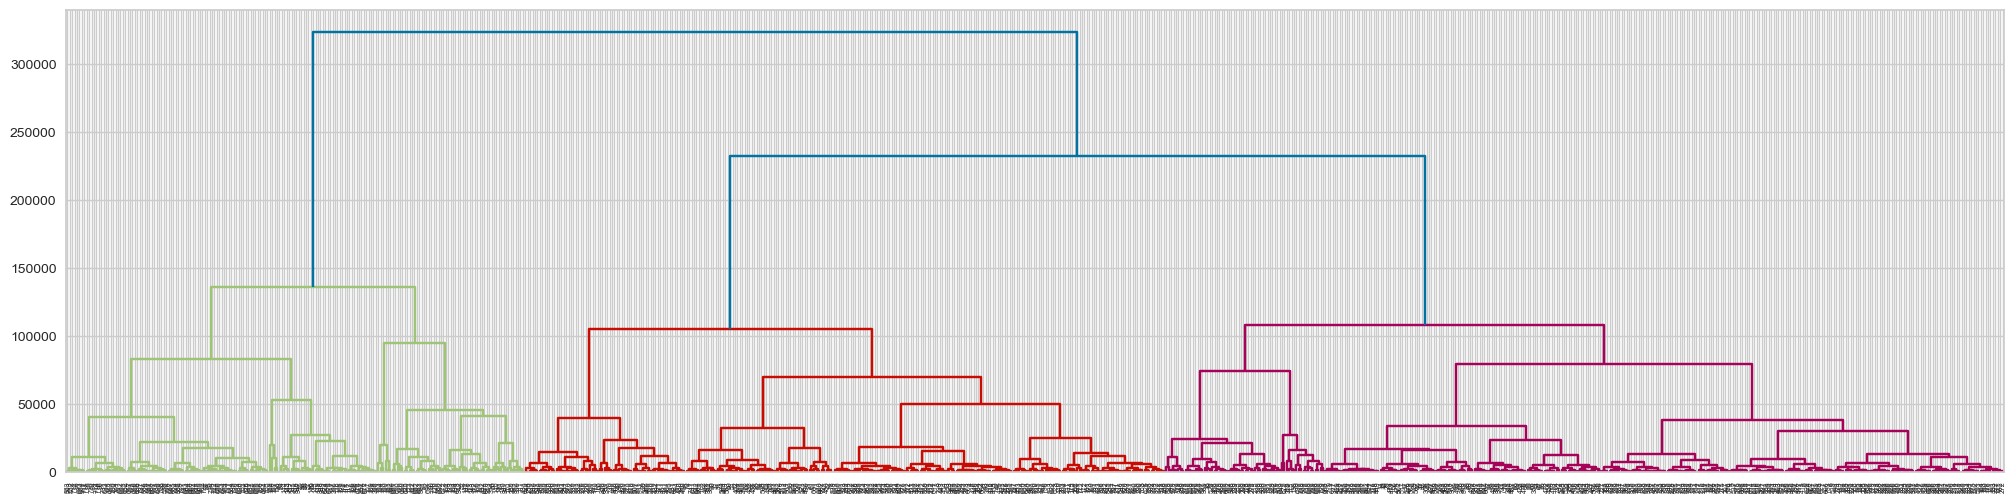

In [29]:
plt.figure(figsize= (25,6))
dendrogram(data)

In [38]:
from sklearn.cluster import DBSCAN # baska bir clustering algoritmasi

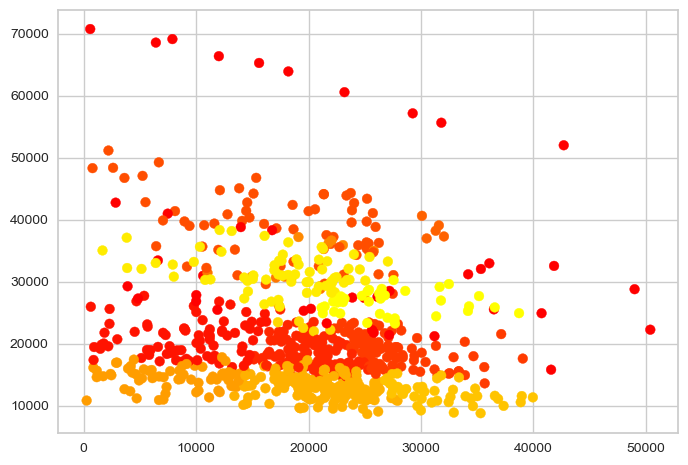

In [39]:
db = DBSCAN(min_samples= 5)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
x2=StandardScaler().fit_transform(x)
y=db.fit_predict(x2)

plt.scatter(x['Mileage'],x['Price'],c=y,cmap='autumn')

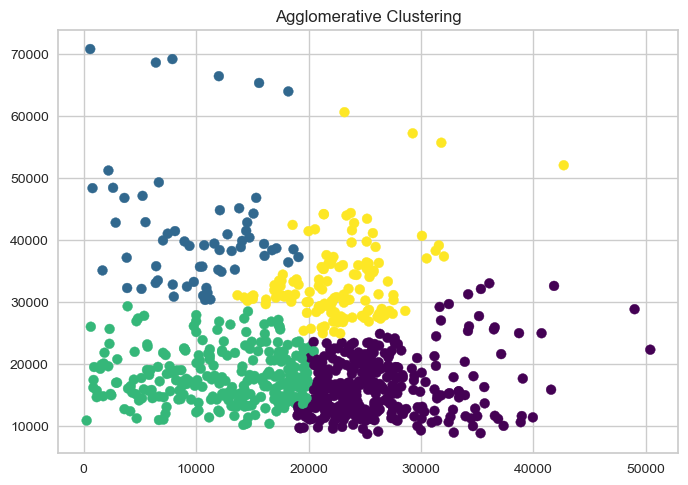

In [41]:

from sklearn.cluster import AgglomerativeClustering  ##

agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(x)

# Plot the results
plt.scatter(x.Mileage, x.Price, c=y_agg, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.show()
